In [1]:
import pandas as pd
import glob
files = glob.glob("C:/Users/uchei/OneDrive/Desktop/csvs_per_year/csvs_per_year**/*.csv")

df = pd.DataFrame()
for f in files:
    csv = pd.read_csv(f)
    df = df.append(csv)

In [2]:
df.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
1,2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [3]:
df['date'] = pd.to_datetime(df.date, infer_datetime_format = True)
df.dtypes

date       datetime64[ns]
BEN               float64
CO                float64
EBE               float64
MXY               float64
NMHC              float64
NO_2              float64
NOx               float64
OXY               float64
O_3               float64
PM10              float64
PXY               float64
SO_2              float64
TCH               float64
TOL               float64
station             int64
PM25              float64
NO                float64
CH4               float64
dtype: object

CO, TCH and CH4 are measured in mgm-3. We need to convert this to μgm-3.

In [4]:
#Divide columns by 1000 to get desired unit
df['CO'] = df['CO']/1000
df['TCH'] = df['TCH']/1000
df['CH4'] = df['CH4']/1000

In [5]:
df.isnull().sum()

date             0
BEN        2766540
CO         1157212
EBE        2806500
MXY        3492809
NMHC       2722912
NO_2         21174
NOx        1431949
OXY        3492529
O_3         816492
PM10        946969
PXY        3492640
SO_2       1032264
TCH        2721783
TOL        2769295
station          0
PM25       2991800
NO         2275827
CH4        3793374
dtype: int64

In [6]:
df_stations = df.groupby('station')
casa_de_campo = df_stations.get_group(28079024)
casa_de_campo.index = casa_de_campo.date
casa_de_campo = casa_de_campo.drop(['date'], axis = 1)
casa_de_campo.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,0.80,0.00043,0.71,1.20,0.10,27.190001,29.700001,0.76,56.990002,114.300003,0.49,10.84,0.00142,3.43,28079024,NaN,NaN,NaN
2001-08-01 02:00:00,0.74,0.00051,0.78,1.23,0.12,36.980000,38.310001,0.78,46.939999,78.949997,0.51,11.01,0.00138,3.72,28079024,NaN,NaN,NaN
2001-08-01 03:00:00,1.07,0.00043,1.09,2.04,0.11,32.250000,33.310001,1.14,52.419998,61.790001,0.81,10.76,0.00137,6.39,28079024,NaN,NaN,NaN
2001-08-01 04:00:00,0.81,0.00042,0.92,1.65,0.11,28.740000,29.820000,0.91,55.980000,58.320000,0.67,10.49,0.00137,5.14,28079024,NaN,NaN,NaN
2001-08-01 05:00:00,0.72,0.00042,0.94,1.67,0.09,26.270000,28.290001,0.91,61.160000,51.660000,0.67,10.29,0.00145,5.88,28079024,NaN,NaN,NaN


In [7]:
casa_de_campo.shape

(151416, 18)

# Missing Value Treatment

In [8]:
casa_de_campo.isnull().sum()/151416 * 100

BEN         8.919797
CO          1.081127
EBE        11.659270
MXY        52.230279
NMHC        1.944312
NO_2        1.079146
NOx        39.737544
OXY        52.230279
O_3         1.506446
PM10        1.557299
PXY        52.229619
SO_2        1.045464
TCH         1.911291
TOL         8.927722
station     0.000000
PM25       19.554737
NO         58.006419
CH4        96.756618
dtype: float64

In [9]:
casa_de_campo = casa_de_campo.drop(['MXY', 'OXY', 'PXY', 'NO', 'CH4', 'station'], axis = 1)

In [10]:
casa_de_campo.skew()

BEN      8.850090
CO       2.098004
EBE     11.806298
NMHC     1.627515
NO_2     1.400706
NOx      2.535055
O_3      0.410557
PM10     2.645797
SO_2     2.178624
TCH      3.163313
TOL      4.787562
PM25     2.017436
dtype: float64

In [11]:
casa_de_campo['O_3'].fillna(casa_de_campo['O_3'].mean(), inplace = True)

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

campo_imputed = pd.DataFrame(mice_imputer.fit_transform(casa_de_campo), columns=casa_de_campo.columns, index = casa_de_campo.index)

C:\Users\uchei\anaconda3\anaconda3.8\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [13]:
campo_imputed

,BEN,CO,EBE,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,TOL,PM25
date,,,,,,,,,,,,
2001-08-01 01:00:00,0.80,0.00043,0.71,0.10,27.190001,29.700001,56.990002,114.300003,10.84,0.00142,3.43,37.065908
2001-08-01 02:00:00,0.74,0.00051,0.78,0.12,36.980000,38.310001,46.939999,78.949997,11.01,0.00138,3.72,26.624312
2001-08-01 03:00:00,1.07,0.00043,1.09,0.11,32.250000,33.310001,52.419998,61.790001,10.76,0.00137,6.39,21.302983
2001-08-01 04:00:00,0.81,0.00042,0.92,0.11,28.740000,29.820000,55.980000,58.320000,10.49,0.00137,5.14,20.226145
2001-08-01 05:00:00,0.72,0.00042,0.94,0.09,26.270000,28.290001,61.160000,51.660000,10.29,0.00145,5.88,18.166080
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31 20:00:00,0.60,0.00040,0.40,0.10,92.000000,134.000000,1.000000,20.000000,6.00,0.00121,3.40,11.000000
2018-01-31 21:00:00,1.40,0.00070,1.10,0.19,130.000000,354.000000,1.000000,34.000000,12.00,0.00138,8.70,19.000000
2018-01-31 22:00:00,1.80,0.00070,1.70,0.19,129.000000,361.000000,1.000000,45.000000,11.00,0.00140,11.90,26.000000


In [14]:
#Checking stationarity of data
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(campo_imputed['CO'].values)
print('p-value: %f' % result[1])

p-value: 0.000000


# Resampling, Visualization and Modeling

To get a more detailed sense of the data, I will be resampling the data into different categories.

In [15]:
#Get the mean of values in the dataset on a weekly basis
weekly_campo = campo_imputed.resample("W").mean()
weekly_campo.head()

,BEN,CO,EBE,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,TOL,PM25
date,,,,,,,,,,,,
2001-01-07,0.300778,0.000609,0.634659,0.101257,22.724072,29.141138,32.513593,11.161497,8.999102,0.001360,2.664012,7.059679
2001-01-14,0.723155,0.000895,1.506137,0.190833,50.246667,96.241250,13.021190,24.191012,15.050119,0.001530,9.041607,13.579091
2001-01-21,0.360680,0.000766,0.810982,0.145546,31.553437,59.960936,22.960567,18.665488,11.686437,0.001450,4.091799,10.984147
2001-01-28,0.245893,0.000602,0.519440,0.104405,19.118274,32.080833,34.955595,11.409762,9.036905,0.001362,1.797560,7.792134
2001-02-04,0.527922,0.000896,1.106830,0.199107,46.180714,100.564573,18.813333,27.269583,16.739048,0.001536,5.555494,15.436809


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:xlabel='Date', ylabel='Levls of Carbon Monoxide (μgm-3) '>)

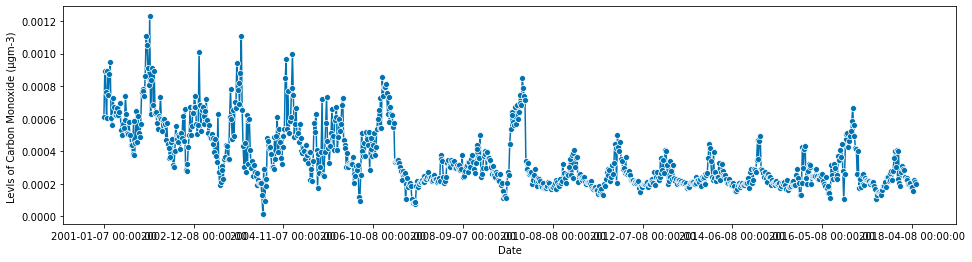

In [16]:
from sktime.utils.plotting import plot_series
plot_series(weekly_campo['CO'], x_label = 'Date', y_label = 'Levls of Carbon Monoxide (μgm-3) ')

We can see that Carbon Monoxide levels were consistently high before 2007, before largely maintaining values below 0.004.

In [17]:
weekly_campo['CO'].idxmax()

Timestamp('2001-12-30 00:00:00', freq='W-SUN')

In [18]:
weekly_campo['CO'].max()

0.001228988092747472

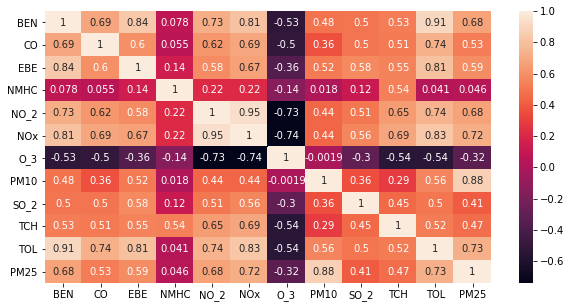

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(weekly_campo.corr(), annot = True, ax = ax)
plt.show()

NMHC and PM10 don't have a large effect on the value of Carbon Monoxide, as their correlation is low. Let's drop these and go with the other gases.

In [20]:
corr_weekly = weekly_campo.drop(['NMHC', 'PM10'], axis = 1)
corr_weekly.head()

,BEN,CO,EBE,NO_2,NOx,O_3,SO_2,TCH,TOL,PM25
2001-01-07,0.300778,0.000609,0.634659,22.724072,29.141138,32.513593,8.999102,0.001360,2.664012,7.059679
2001-01-14,0.723155,0.000895,1.506137,50.246667,96.241250,13.021190,15.050119,0.001530,9.041607,13.579091
2001-01-21,0.360680,0.000766,0.810982,31.553437,59.960936,22.960567,11.686437,0.001450,4.091799,10.984147
2001-01-28,0.245893,0.000602,0.519440,19.118274,32.080833,34.955595,9.036905,0.001362,1.797560,7.792134
2001-02-04,0.527922,0.000896,1.106830,46.180714,100.564573,18.813333,16.739048,0.001536,5.555494,15.436809


In [21]:
#Creating lag variables
dataframe = pd.DataFrame()
#On a weekly basis, the ideal number of lags should be 54.
for i in range(54, 0, -1):
    dataframe['t-' + str(i)] = corr_weekly.CO.shift(i)
#Combine the lagged dataframe with the original
lagged_data = pd.concat([corr_weekly, dataframe], axis = 1)
lagged_data.dropna(inplace = True)

In [22]:
#Slice the data into train and test
#The testing slice is for the final 26 weeks of the dataset
train = lagged_data.loc['2002-01-20' : '2017-11-05']
test = lagged_data.loc['2017-11-12' : '2018-05-06']
x_test = test.loc[:, test.columns != 'CO']
y_test = test['CO']
x_train = train.loc[:, train.columns != 'CO']
y_train = train['CO']

In [23]:
print("Training model...")
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfe_weekly = RFE(estimator = reg_forest, n_features_to_select = 13)
fit_weekly = rfe_weekly.fit(x_train, y_train)
predictions = fit_weekly.predict(x_test)

Training model...


In [24]:
import numpy as np
correct = np.array(y_test)
sumvalue = np.sum(correct)
mape = np.sum(np.abs((correct - predictions))) / sumvalue * 100
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.69 %.


In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

0.8148719975961443


In [26]:
#As the predictions are in array,  we need to convert them to a DataFrame in order for the plot_series function to read it
predicted_df = pd.DataFrame(predictions)
predicted_df['date'] = y_test.index
predicted_df['date'] = pd.to_datetime(predicted_df.date, infer_datetime_format = True)
predicted_df.index = predicted_df['date']
predicted_df = predicted_df.drop(['date'], axis = 1)
predicted_df.index = pd.to_datetime(predicted_df.index)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:xlabel='Date', ylabel='CO Levels (μgm-3)'>)

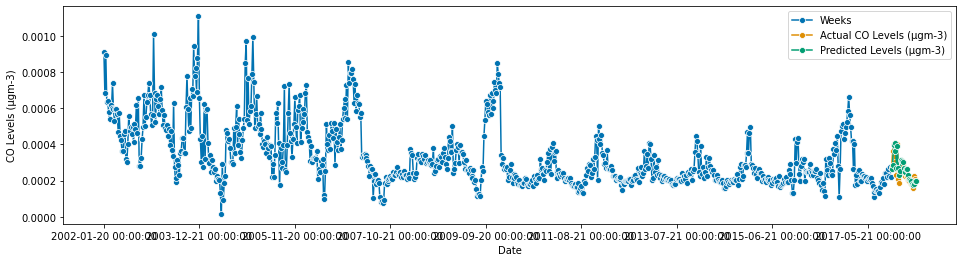

In [27]:
from sktime.utils.plotting import plot_series
plot_series(y_train, y_test, predicted_df, x_label = 'Date', y_label = 'CO Levels (μgm-3)', labels = ['Weeks', 'Actual CO Levels (μgm-3)', 'Predicted Levels (μgm-3)'])

# Monthly Resampling

In [28]:
monthly_campo = campo_imputed.resample('M').mean()
monthly_campo.head()

,BEN,CO,EBE,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,TOL,PM25
date,,,,,,,,,,,,
2001-01-31,0.414541,0.000732,0.885015,0.141739,32.295138,58.547520,25.748446,17.377473,11.736651,0.001434,4.461403,10.364682
2001-02-28,0.644594,0.000835,1.300327,0.163249,40.837235,73.929312,28.087449,22.688923,14.525948,0.001460,6.781737,12.062181
2001-03-31,0.756352,0.000638,1.083828,0.099920,23.361746,34.746174,41.876160,19.483066,10.302535,0.001368,3.867788,9.831165
2001-04-30,0.738180,0.000640,1.013931,0.108207,24.390546,32.133312,53.294358,22.589963,10.647707,0.001331,2.838093,10.444236
2001-05-31,0.983992,0.000597,1.279161,0.110866,34.736183,42.970296,54.114328,26.182419,10.941640,0.001367,4.227191,11.632579


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='CO'>)

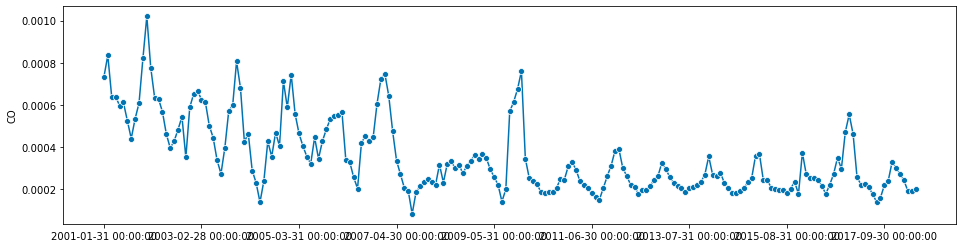

In [29]:
plot_series(monthly_campo['CO'])

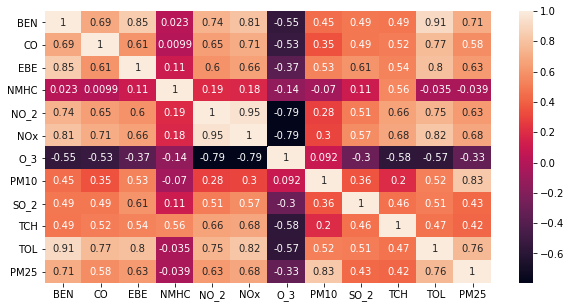

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(monthly_campo.corr(), annot = True, ax = ax)
plt.show()

In [31]:
#Select highly correlated columns
relevant_monthly = monthly_campo.drop(['NMHC', 'PM10'], axis = 1)
relevant_monthly

,BEN,CO,EBE,NO_2,NOx,O_3,SO_2,TCH,TOL,PM25
2001-01-31,0.414541,0.000732,0.885015,32.295138,58.547520,25.748446,11.736651,0.001434,4.461403,10.364682
2001-02-28,0.644594,0.000835,1.300327,40.837235,73.929312,28.087449,14.525948,0.001460,6.781737,12.062181
2001-03-31,0.756352,0.000638,1.083828,23.361746,34.746174,41.876160,10.302535,0.001368,3.867788,9.831165
2001-04-30,0.738180,0.000640,1.013931,24.390546,32.133312,53.294358,10.647707,0.001331,2.838093,10.444236
2001-05-31,0.983992,0.000597,1.279161,34.736183,42.970296,54.114328,10.941640,0.001367,4.227191,11.632579
...,...,...,...,...,...,...,...,...,...,...
2018-01-31,0.578919,0.000273,0.264356,29.951050,56.219945,31.226520,4.179686,0.001217,2.052487,8.590382
2018-02-28,0.547949,0.000244,0.197562,28.320046,43.050531,42.487002,4.008538,0.001208,1.381282,7.876102
2018-03-31,0.327439,0.000194,0.133654,11.406279,15.157596,70.995515,3.308796,0.001150,0.549322,4.775482
2018-04-30,0.267473,0.000195,0.144956,13.247475,17.158050,72.289810,3.555211,0.001195,0.749325,10.045679


In [32]:
#Creating lag variables
dataframe = pd.DataFrame()
for i in range(12, 0, -1):
    dataframe['t-' + str(i)] = relevant_monthly.CO.shift(i)
lagged_monthly = pd.concat([relevant_monthly, dataframe], axis = 1)
lagged_monthly.dropna(inplace = True)

In [33]:
#Adding seasonal variables
train1 = lagged_monthly.loc['2002-01-31' : '2017-11-30']
test1 = lagged_monthly.loc['2017-12-31' : '2018-05-31']
x_test1 = test1.loc[:, test1.columns != 'CO']
y_test1 = test1['CO']
x_train1 = train1.loc[:, train1.columns != 'CO']
y_train1 = train1['CO']

In [34]:
print("Training model...")
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
monthly_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
monthly_rfe = RFE(estimator = monthly_reg, n_features_to_select = 9)
monthly_fit = monthly_rfe.fit(x_train1, y_train1)
predictions1 = monthly_fit.predict(x_test1)

Training model...


In [35]:
import numpy as np
correct1 = np.array(y_test1)
sumvalue1 = np.sum(correct1)
mape1 = np.sum(np.abs((correct1 - predictions1))) / sumvalue1 * 100
accuracy1 = 100 - mape1
print('Accuracy:', round(accuracy1, 2), '%.')

Accuracy: 86.44 %.


In [36]:
df1 = pd.DataFrame(predictions1)
df1['date'] = y_test1.index
df1['date'] = pd.to_datetime(df1.date, infer_datetime_format = True)
df1.index = df1['date']
df1 = df1.drop(['date'], axis = 1)
df1.index = pd.to_datetime(df1.index)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='CO'>)

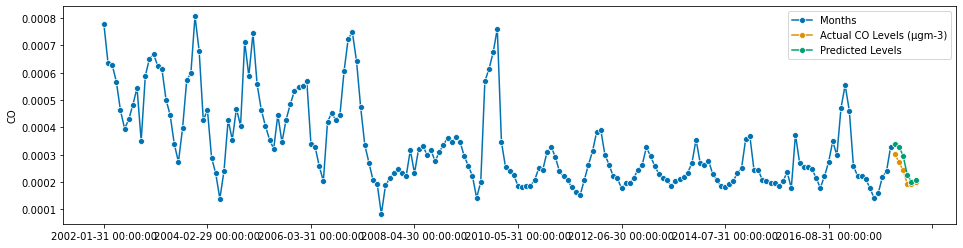

In [37]:
plot_series(y_train1, y_test1, df1, labels = ['Months', 'Actual CO Levels (μgm-3)', 'Predicted Levels'])

# Quarterly Resampling

In [38]:
quarterly_campo = campo_imputed.resample('Q').mean()
quarterly_campo.head()

,BEN,CO,EBE,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,TOL,PM25
date,,,,,,,,,,,,
2001-03-31,0.603936,0.000732,1.082795,0.134023,31.875428,55.133144,32.034147,19.756285,12.110632,0.001419,4.979057,10.709185
2001-06-30,0.927381,0.000616,1.225919,0.116546,31.737309,39.714668,56.483128,29.222734,10.992088,0.001353,3.832618,12.430131
2001-09-30,0.854558,0.000500,1.068802,0.112489,32.763724,38.530765,56.109720,35.699621,11.301790,0.001366,4.131654,14.099007
2001-12-31,1.924520,0.000812,1.953891,0.158461,47.552602,95.953361,19.007608,32.213392,11.011757,0.001449,9.920872,17.461684
2002-03-31,1.636680,0.000682,1.566636,0.144568,49.075265,80.585566,24.755471,26.453765,4.004783,0.001376,7.001233,15.320316


(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='CO'>)

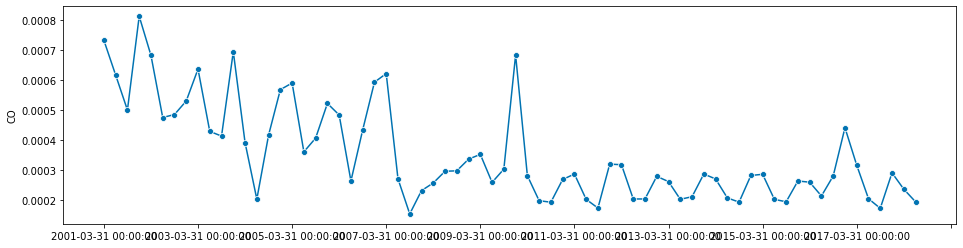

In [39]:
plot_series(quarterly_campo['CO'])

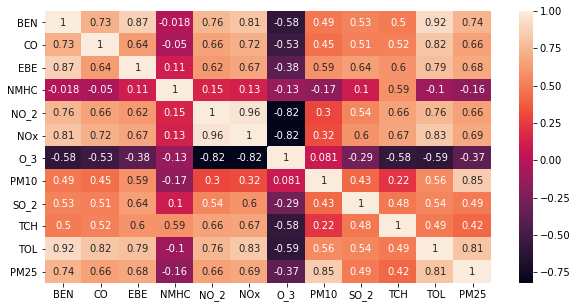

In [40]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(quarterly_campo.corr(), annot = True, ax = ax)
plt.show()

In [41]:
relevant_quarterly = quarterly_campo.drop(['NMHC'], axis = 1)
relevant_quarterly.head()

,BEN,CO,EBE,NO_2,NOx,O_3,PM10,SO_2,TCH,TOL,PM25
2001-03-31,0.603936,0.000732,1.082795,31.875428,55.133144,32.034147,19.756285,12.110632,0.001419,4.979057,10.709185
2001-06-30,0.927381,0.000616,1.225919,31.737309,39.714668,56.483128,29.222734,10.992088,0.001353,3.832618,12.430131
2001-09-30,0.854558,0.000500,1.068802,32.763724,38.530765,56.109720,35.699621,11.301790,0.001366,4.131654,14.099007
2001-12-31,1.924520,0.000812,1.953891,47.552602,95.953361,19.007608,32.213392,11.011757,0.001449,9.920872,17.461684
2002-03-31,1.636680,0.000682,1.566636,49.075265,80.585566,24.755471,26.453765,4.004783,0.001376,7.001233,15.320316


In [42]:
#Creating lag variables
dataframe = pd.DataFrame()
for i in range(4, 0, -1):
    dataframe['t-' + str(i)] = relevant_quarterly.CO.shift(i)
lagged_quarterly = pd.concat([relevant_quarterly, dataframe], axis = 1)
lagged_quarterly.dropna(inplace = True)

In [43]:
quarter_train = lagged_quarterly.loc['2002-03-31' : '2016-12-31']
quarter_test = lagged_quarterly.loc['2017-03-31' : '2018-03-31']
x_test2 = quarter_test.loc[:, quarter_test.columns != 'CO']
y_test2 = quarter_test['CO']
x_train2 = quarter_train.loc[:, quarter_train.columns != 'CO']
y_train2 = quarter_train['CO']

In [44]:
quarterly_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
quarterly_rfe = RFE(estimator = quarterly_reg, n_features_to_select = 9)
quarterly_fit = quarterly_rfe.fit(x_train, y_train)
predictions = quarterly_fit.predict(x_test)

In [45]:
import numpy as np
correct = np.array(y_test)
sumvalue = np.sum(correct)
mape = np.sum(np.abs((correct - predictions))) / sumvalue * 100
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 89.38 %.


In [46]:
df1 = pd.DataFrame(predictions)
df1['date'] = y_test.index
df1['date'] = pd.to_datetime(df1.date, infer_datetime_format = True)
df1.index = df1['date']
df1 = df1.drop(['date'], axis = 1)
df1.index = pd.to_datetime(df1.index)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='CO'>)

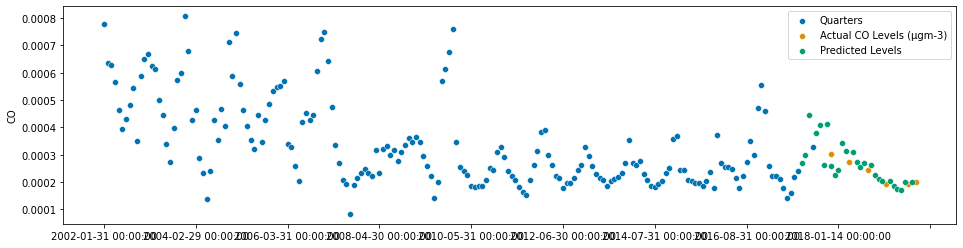

In [47]:
plot_series(y_train1, y_test1, df1, labels = ['Quarters', 'Actual CO Levels (μgm-3)', 'Predicted Levels'])

Weekly Resampling has the highest prediction accuracy of all the timeframes.